In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")

DATA_PATH = "../../data/processed/kinematic_equation_cleaned_dataset.csv"
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Feature-engineered dataset not found at: {DATA_PATH}")

In [2]:
df = pd.read_csv(DATA_PATH)
print(f"Loaded dataset: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()

Loaded dataset: 3000 rows × 7 columns


,Acceleration_ms2,Time_s,Displacement_m,a_times_t2,log_acceleration,log_time,log_displacement
0,7.803532,6.759760,178.288670,356.577340,2.054576,1.910987,5.183404
1,19.038929,7.987146,607.289463,1214.578927,2.946486,2.077833,6.409006
2,14.773882,2.579632,49.156415,98.312831,2.692861,0.947647,3.895007
3,12.173840,6.286254,240.536730,481.073460,2.499289,1.838365,5.482873
4,3.542363,5.760285,58.769379,117.538759,1.264794,1.750987,4.073621


In [3]:
df["a_times_t2"] = df["Acceleration_ms2"] * (df["Time_s"] ** 2)

In [4]:
features = ["Acceleration_ms2", "Time_s", "a_times_t2"]
target = "Displacement_m"

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = SymbolicRegressor(
    population_size=2000,
    generations=30,
    stopping_criteria=0.001,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    parsimony_coefficient=0.001,
    random_state=42
)

model.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    33.27      1.13389e+23       15          4.18778          4.43055      2.13m
   1    16.29      4.80335e+07       15          1.97717          1.20731      1.35m
   2    20.21      1.88949e+08       15          1.84749          2.37444      1.44m
   3    18.99           820733       33         0.586267         0.629927      1.28m
   4    25.05      4.80543e+10       19        0.0711313        0.0711313      1.40m
   5    30.02      4.89924e+06       39        0.0620596        0.0476449      1.75m
   6    35.79      2.06666e+07       41        0.0482374        0.0550952      1.50m
   7    34.61           373151       17       1.3958e-14       1.3511e-14      1.43m


SymbolicRegressor(generations=30, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, population_size=2000, random_state=42,
                  stopping_criteria=0.001, verbose=1)

In [6]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 1.0000
RMSE: 0.0000


In [7]:
print("Discovered symbolic expression:")
print(model._program)

Discovered symbolic expression:
mul(add(X2, mul(sub(X2, X2), X0)), div(add(X0, sub(X0, X0)), add(X0, X0)))


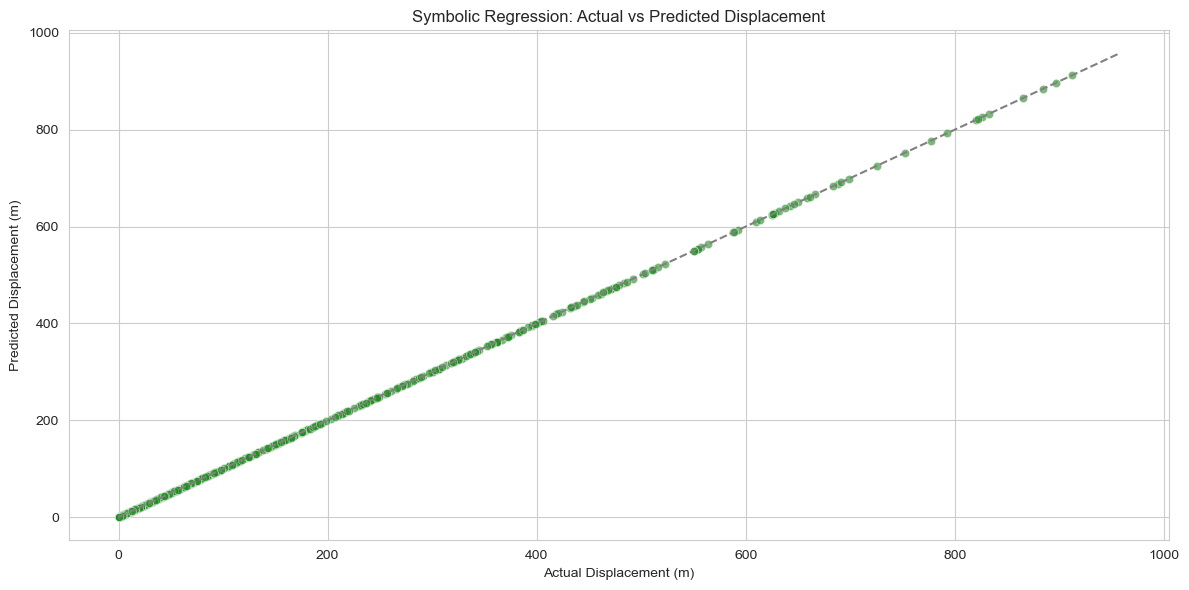

In [8]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="forestgreen")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.xlabel("Actual Displacement (m)")
plt.ylabel("Predicted Displacement (m)")
plt.title("Symbolic Regression: Actual vs Predicted Displacement")
plt.tight_layout()
plt.show()


In [9]:
os.makedirs("../../results/formulas/", exist_ok=True)

with open("../../results/formulas/kinematic_equation_symbolic_expression.txt", "w") as f:
    f.write(str(model._program))

print("Saved discovered formula to results/formulas/kinematic_equation_symbolic_expression.txt")

Saved discovered formula to results/formulas/kinematic_equation_symbolic_expression.txt
